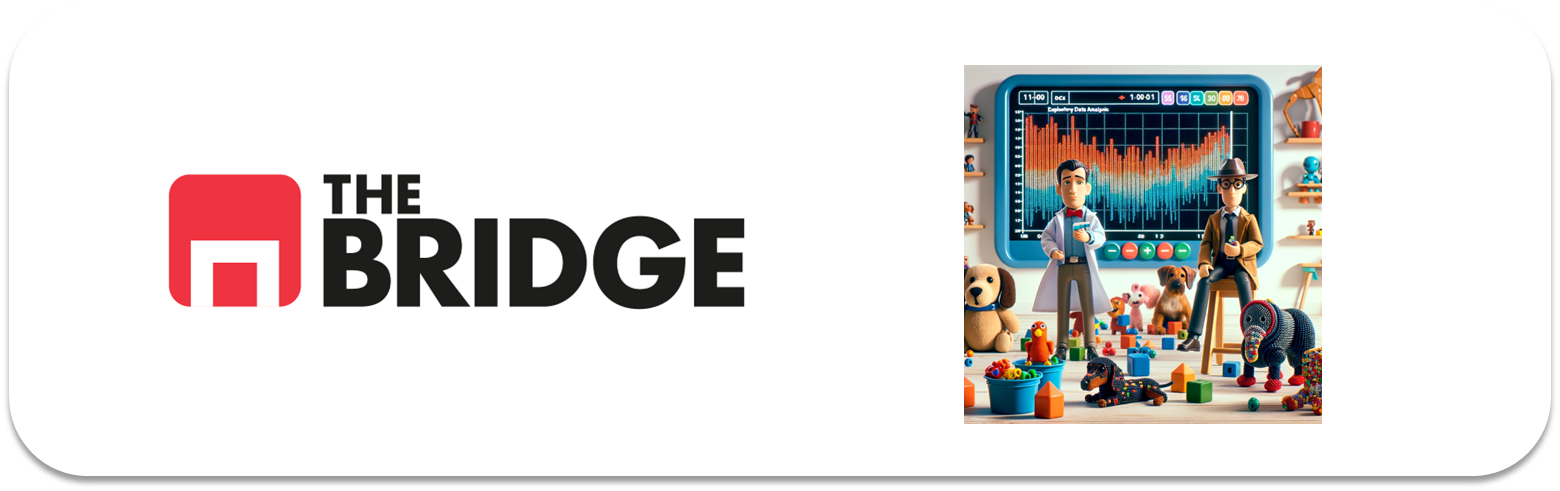

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway

pd.options.mode.copy_on_write = True


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [35]:
df_titanic = pd.read_csv("./data/titanic.csv")


In [36]:
df = df_titanic.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [37]:
df.drop(columns=["deck","survived","pclass","embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [38]:
df["family_members"] = df["parch"] + df["sibsp"]

In [39]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


In [40]:
df.drop(["sibsp","parch"], axis=1)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     889 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


In [25]:
embark_town_mode = df["embark_town"].mode()[0]

In [26]:
df.loc[df["embark_town"].isna(),"embark_town"] = embark_town_mode

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [42]:
#tengo en cuenta el who para el calculo de la media

#creo una columna para imputar edades
df["age_imputed"]= df["age"].isna()

# creacion de variables Mascaras
is_woman = df.who =="woman"
is_child = df.who =="child"
is_man = df.who=="man"

#calculo de valores medianos

mediana_woman = df.loc[is_woman,"age"].median() #halla el valor mediana en la columna "age", de las filas cuyo valor en la columna who sea "woman"
mediana_child = df.loc[is_child,"age"].median()
mediana_man=df.loc[is_man,"age"].median()

#imputar valores medianos en la columna "age"

df.loc[is_woman & df["age_imputed"], "age"]= mediana_woman  
#En las filas cuyas columnas "age_imputed" sean is_woman(columna who==mujer), le pones el valor mediana en la columna "age"
df.loc[is_child & df["age_imputed"],"age"]=mediana_child
df.loc[is_man &df["age_imputed"],"age"]=mediana_man








In [45]:
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,False
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0,False


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

*ver la distribución de nuestra variable directora*

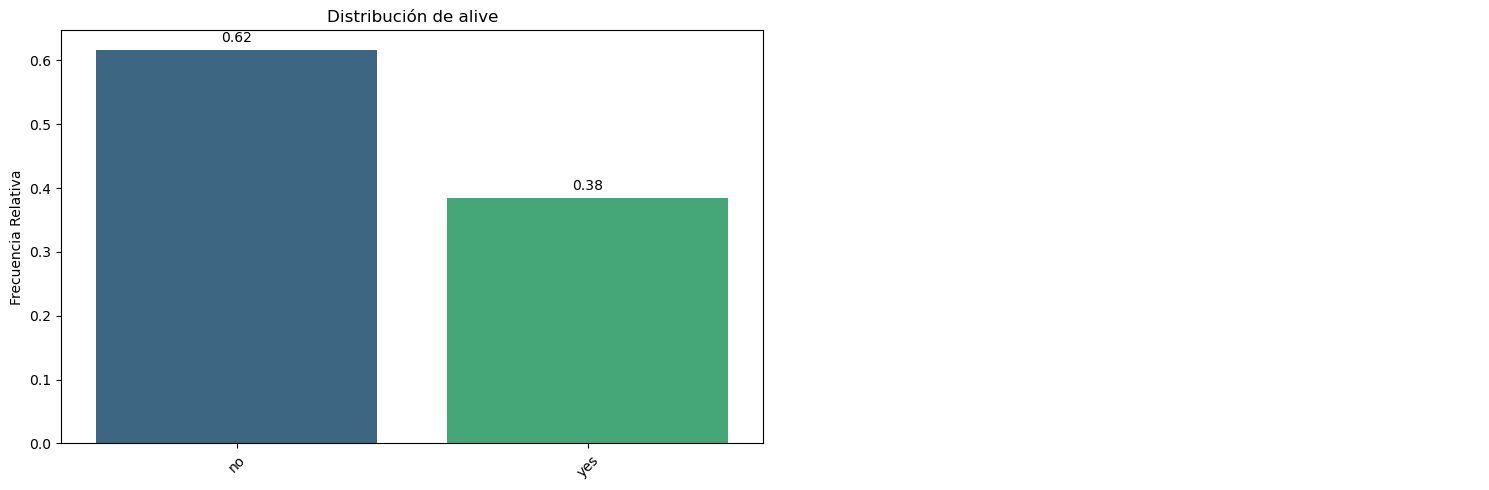

In [46]:
pinta_distribucion_categoricas(df, ["alive"], relativa= True, mostrar_valores= True)

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

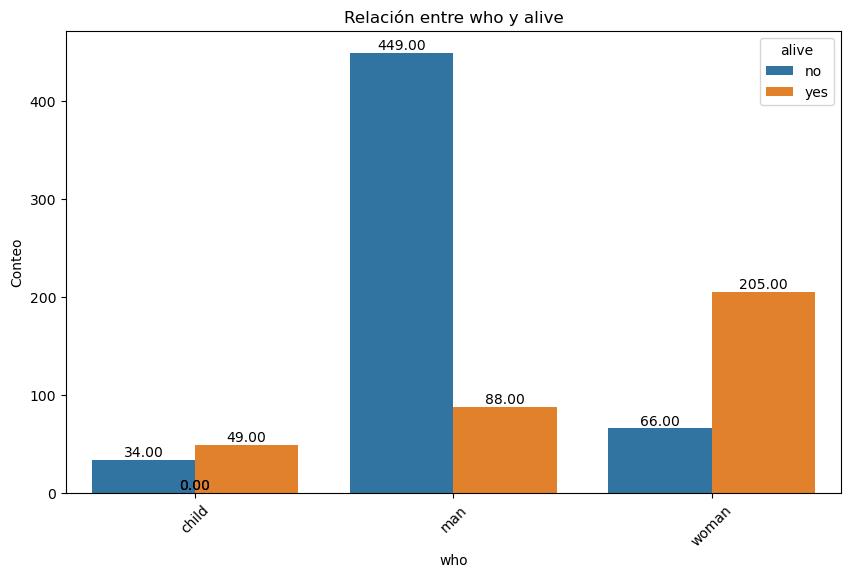

In [47]:
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

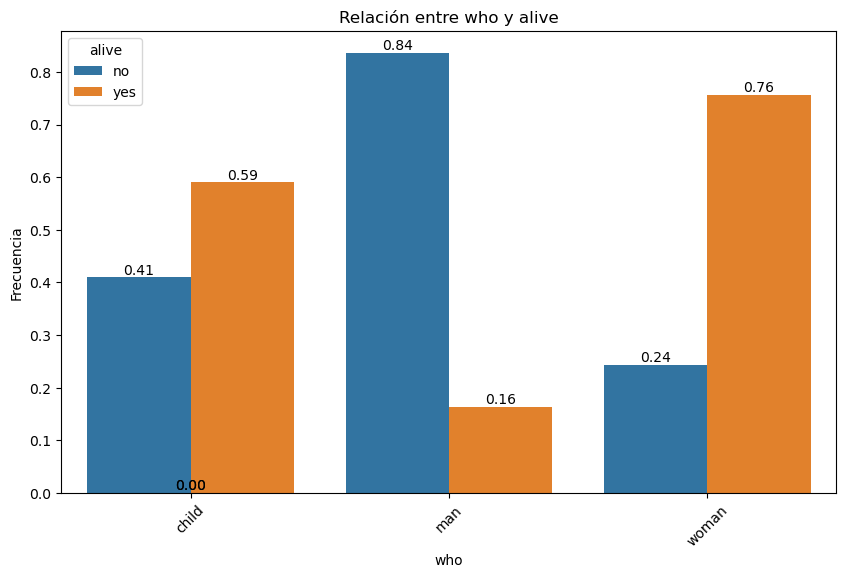

In [48]:
plot_categorical_relationship_fin(df, "who","alive", relative_freq= True, show_values= True)

In [49]:
# Para comparar la relación entre grupo de edad y sexo (variable who) y supervivencia, empleamos el test chi2

tabla_contingencia = pd.crosstab(df["alive"], df["who"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


p_value <<<0.05 lo que quiere decir que son variables dependientes

*Claramente podemos rechazar la hipótesis nula de no dependencia y considerar que sí que hay una relación entre el grupo de edad-sexo y la supervivencia estadísticamente significativa. Ser hombre en el titanic fue duro*  

*Otro dato interesante y que podríamos explorar en un potencial EDA es el hecho de que el grupo de los niños sufrió una mortalidad más del doble que el de las mujeres, lo que podría contradecir el famoso "Mujeres y niños primero".*  

*Probemos por ejemplo un multivariante con clase con la siguiente función:* 

In [50]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta Third:


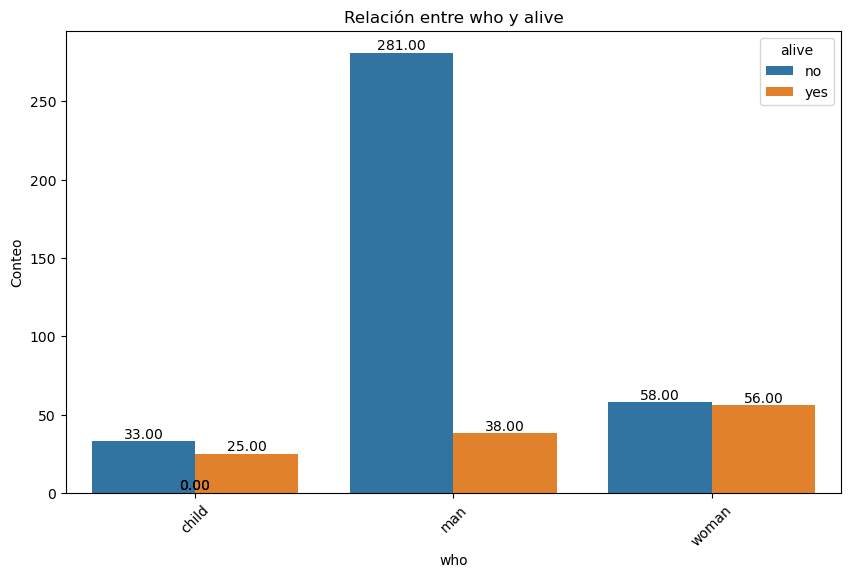

Respuesta First:


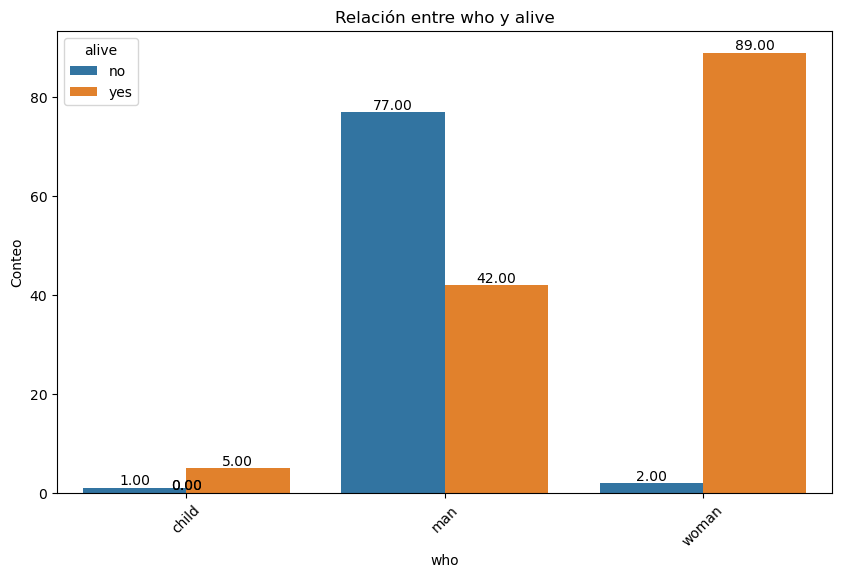

Respuesta Second:


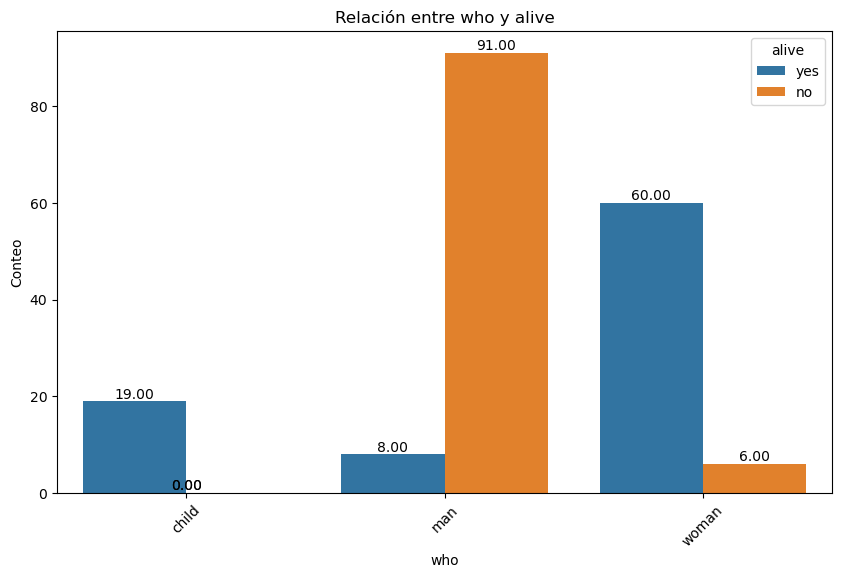

In [51]:
tricategorical_analysis(df, "class", ["alive","who"], muestra_valores= True)

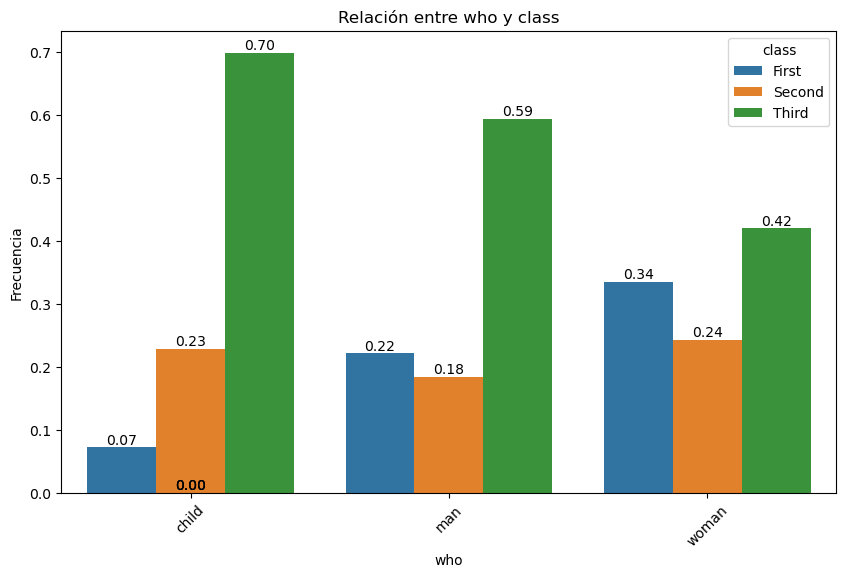

In [52]:
plot_categorical_relationship_fin(df, "who", "class", relative_freq= True, show_values= True)

Había más muejeres en proporcion en segunda y primera clase que niños, y en procentaje hubo mas supervivencia de muejeres que de niños por lo que la varioable clase juega también un factor importante para explicar la supervivencia or mortandad.

*En terminos absolutos sobrevivieron mas mujeres, luego hombres y luego niños.*
*En terminos relativos la mortalidad fue muy superior en hombres, luego en niños y finalmente en mujeres. Los hombres están por encima de la media en moratnadad, ver grafico de barras categorico sobre distribución de alive*

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

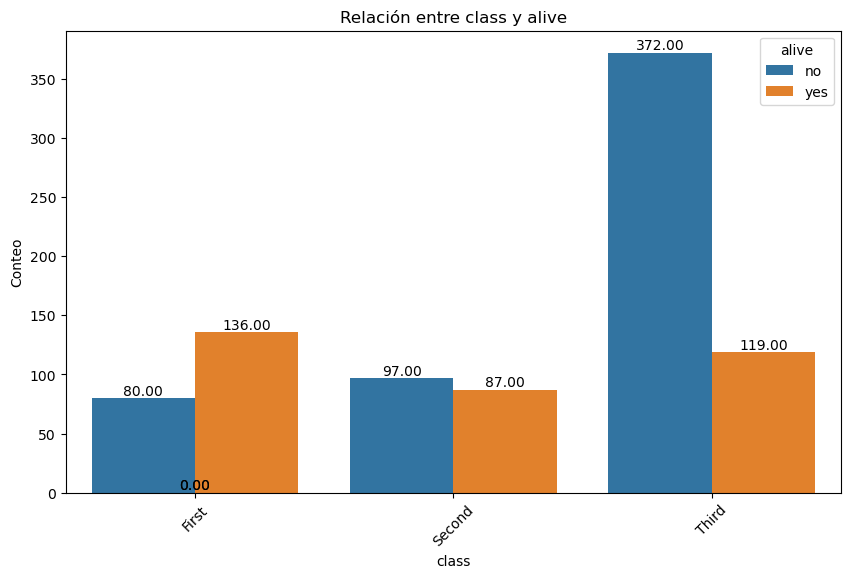

In [53]:
plot_categorical_relationship_fin(df, "class","alive", show_values= True)

En terminos absolutos sobrevivió mas la primera clase, luego la tercera y luego la segunda.

*Veamos en terminos relativos*

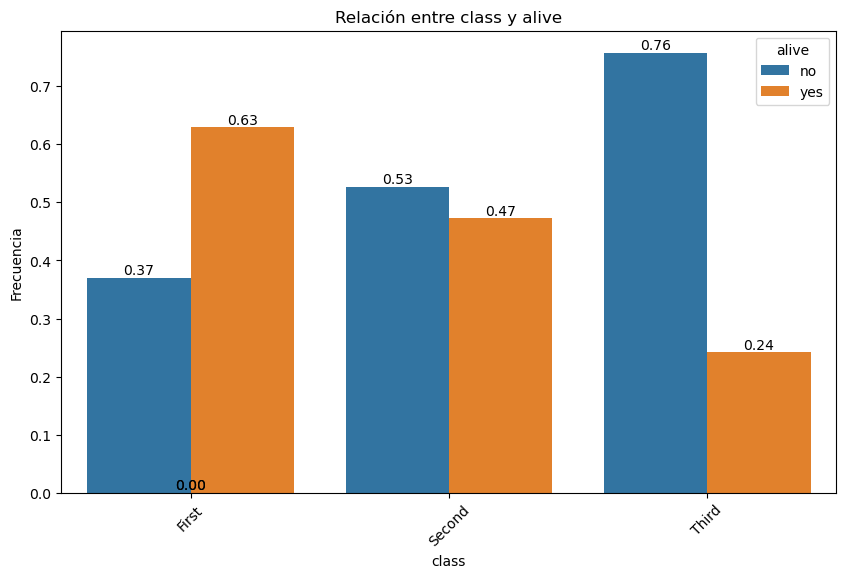

In [54]:
plot_categorical_relationship_fin(df, "class","alive", relative_freq= True, show_values= True)

*En términos relativos, también fue la primera clase la que mayor ratio de supervivencia muestra, aquí además se ve que hay más porcentaje de supervivientes de segunda que de tercera (47% frente a 24%), y que la diferencia en valores absolutos se debe a la diferencia en términos absolutos entre pasajeros que viajaban en segunda y terecera.*

Comprobemos relevancia estadística

In [55]:
tabla_contingencia = pd.crosstab(df["alive"],df["class"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [56]:
p_value <0.05  #las variables dependen...

np.True_

La relación entre la clase y la supervivencia es alta

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

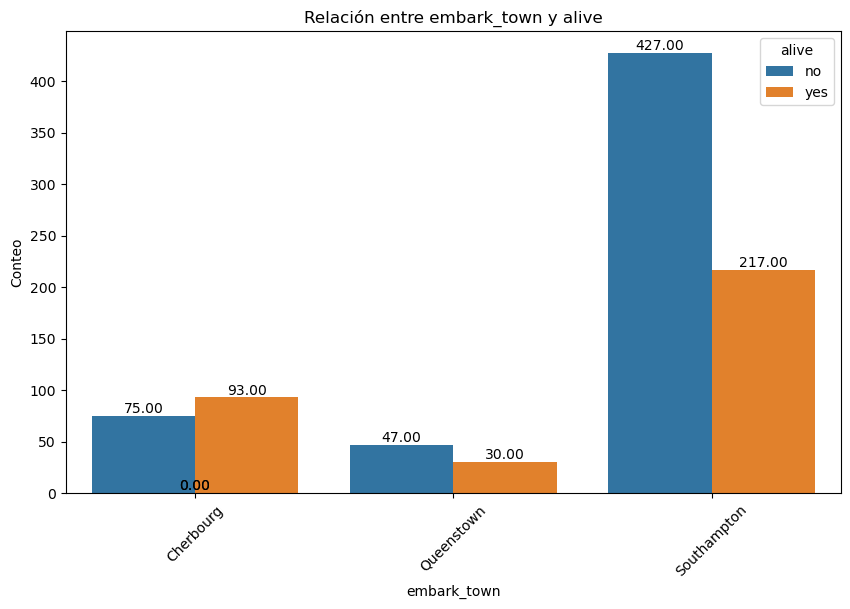

In [57]:
plot_categorical_relationship_fin(df,"embark_town","alive", show_values=True)

In [58]:
df.groupby("embark_town", as_index=False)["alive"].value_counts(normalize=True)

,embark_town,alive,proportion
0,Cherbourg,yes,0.553571
1,Cherbourg,no,0.446429
2,Queenstown,no,0.610390
3,Queenstown,yes,0.389610
4,Southampton,no,0.663043
5,Southampton,yes,0.336957


*Como esperábamos dada la distribución del lugar de embarque de los pasajeros, sobrevivieron más entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos*

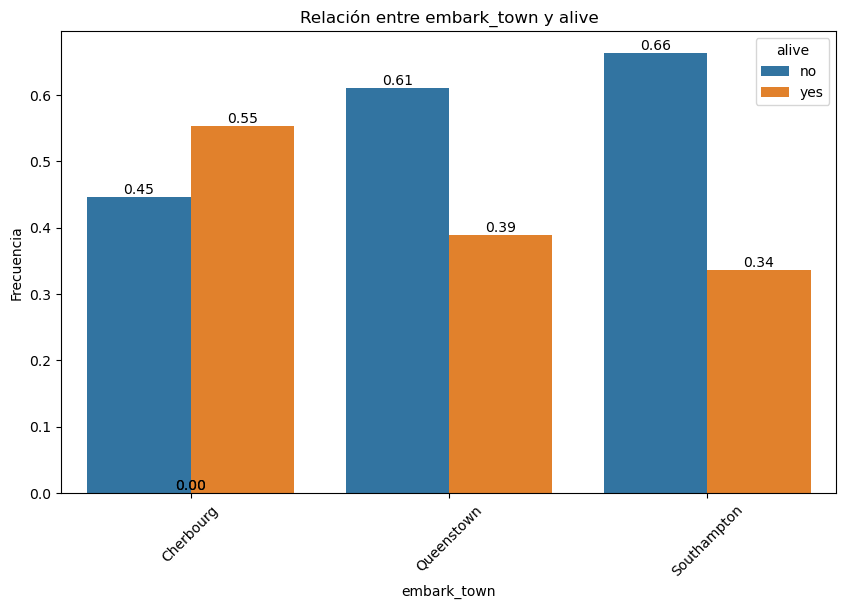

In [59]:
plot_categorical_relationship_fin(df,"embark_town","alive", show_values=True, relative_freq=True)

*El ratio de supervivencia arroja dos datos interesantes y sobre los que profundizar, el ratio de supervivencia en Cherbourg fue mayor que en el resto (55% frente a 39% y 34%) y a su vez el ratio en Queenstown fue mayor que en Southampton. Es decir no sólo hay una diferencia en ratios entre los puertos, sino que además es bastante llamativa.*  

*Este es otro de esos datos en los que hay que profundizar y puede ser un buen punto para contar "la historia de los datos del titanic" (Quizá un rápido vistazo a la distribución de who y de class respecto a los puertos nos lo explique, o quizá sea al revés, se salvaron las mujeres y niños de Cherbourg por ser de allí)*

In [60]:
tabla_contingencia = pd.crosstab(df["alive"],df["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


*evidentemente las variables son dependientes*

Deberiamos estudiar entonces si esa correlacion entre supervivencia y puerto de embarque se debe a quien o que clase embarcó en proporción en cada puerto. 

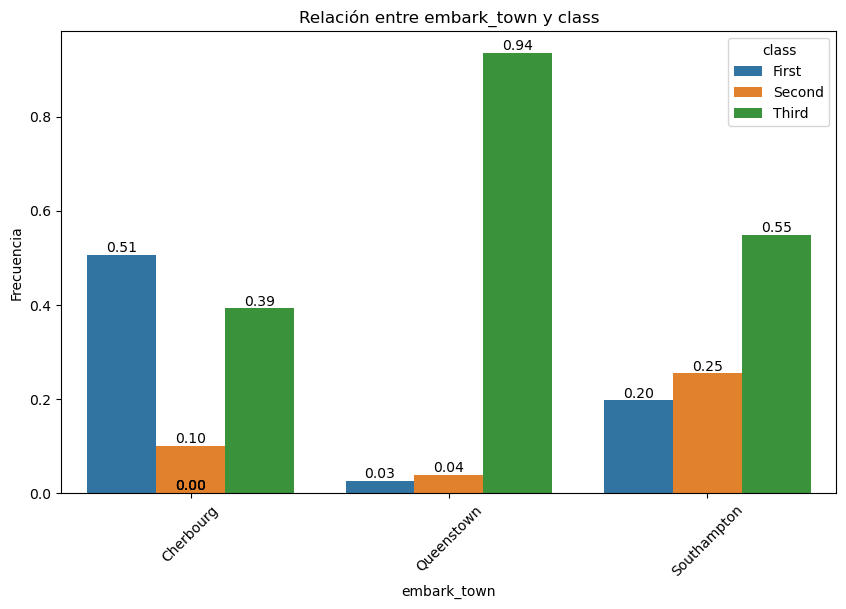

In [61]:
plot_categorical_relationship_fin(df,"embark_town","class",relative_freq=True,show_values=True)

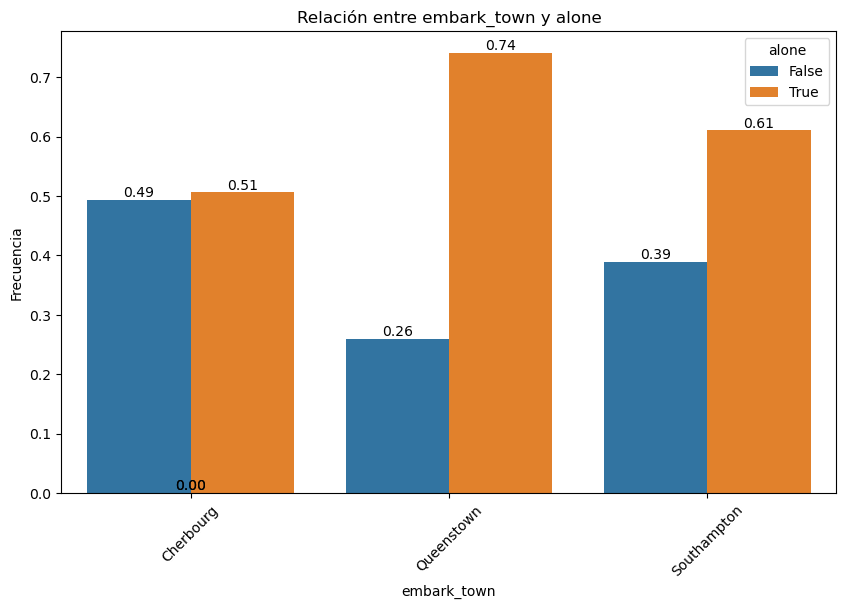

In [62]:
plot_categorical_relationship_fin(df,"embark_town", "alone", relative_freq= True, show_values=True)

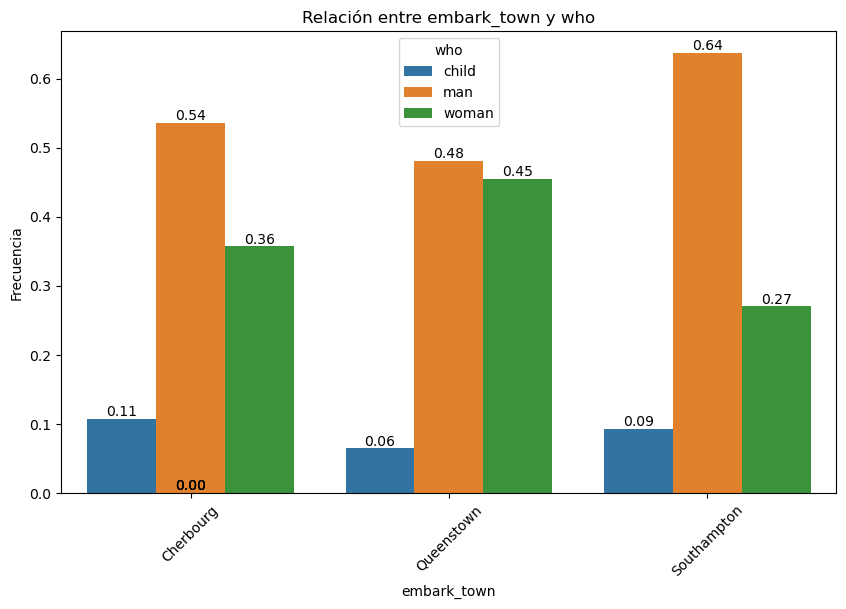

In [63]:
plot_categorical_relationship_fin(df, "embark_town","who", relative_freq= True, show_values= True)

*Viendo esas dos gráficas anteriores parece explicarse todo, en Cherbourg la proporción de pasajeros de primera es mayor bastante mayor que en los otros dos puertos. Y la diferencia entre los ratios de Queenstown y de Southampton podría explicarse por el ratio de mujeres que embarcaron en una y otra ciudad (mayor en Queenstown significativamente que en Southampton).*  

*Parece que más que magia en el origen, el ser mujer y la clase influye mucho como para enmascarar esta relación. ¿Qué deberíamos hacer para hacerla desaparecer matemáticamente?*

Fijamos los valores who y class y vemos si existe relación entre embark_town y alive, si realmente no hay relación entre ellos salvo la debida a la clase del pasaje y al tipo de pasajero saldrá que son independientes para cada combinación

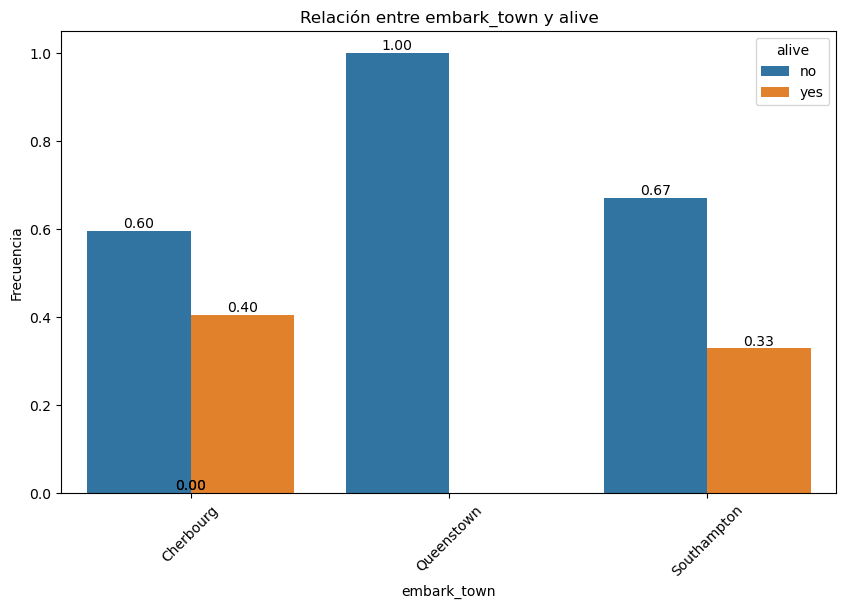

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


In [66]:

df_test = df.loc[(df.who == "man") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Salvo para Cherbourg (donde sólo embarcó 1 hombre en primera) tanto la gráfica como el test Chi-2 nos hacen pensar que no existe relación de supervivencia con el puerto para hombres embarcados en primera.* 

Veamos para pasajeros de segunda clase

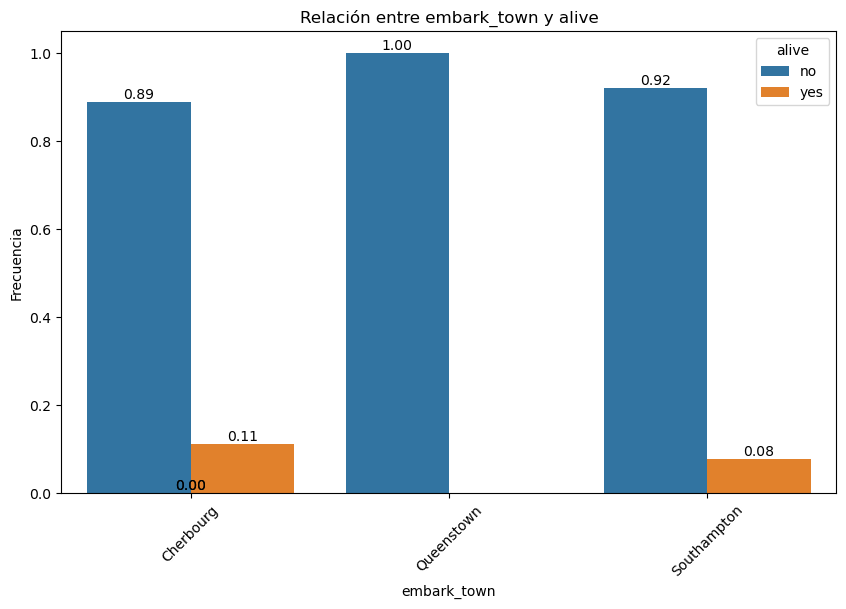

Valor Chi-Cuadrado: 0.20474749969131997
P-Value: 0.9026921075770808
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[8.27272727e+00 9.19191919e-01 8.18080808e+01]
 [7.27272727e-01 8.08080808e-02 7.19191919e+00]]


In [67]:
df_test = df.loc[(df.who == "man") & (df["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*no se aprecia relacion en hombres de segunda clase, entre puerto de embarque y supervivencia*

*Probamos con los de tercera clase*

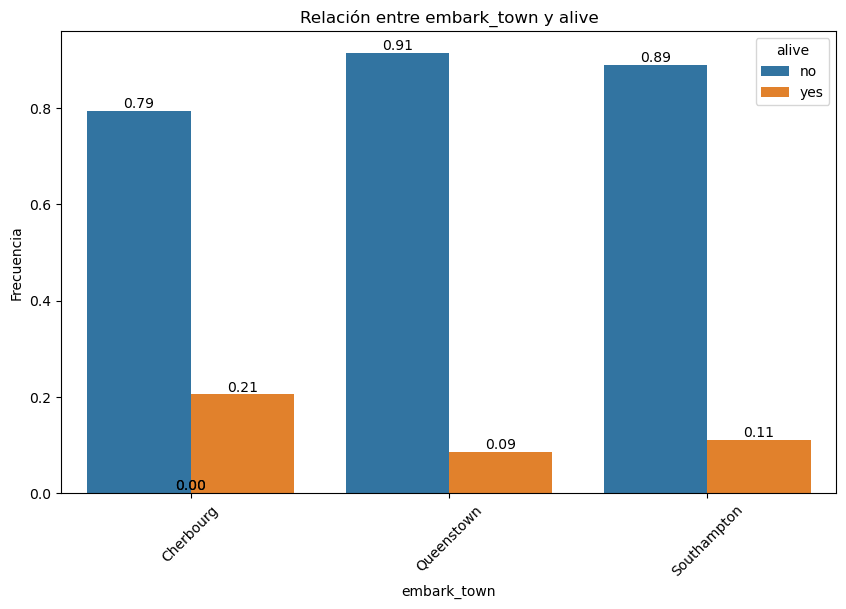

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [68]:
df_test=df.loc[(df.who=="man")&(df["class"]=="Third")].copy()  #Fijo clase y who por tercera vez...

plot_categorical_relationship_fin(df_test, "embark_town", "alive", relative_freq = True, show_values=True)

tabla_contingencia=pd.crosstab(df_test["alive"], df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
                               



*Aunque hay variaciones porcentuales entre Cherbourg y el resto de lugares de embarque no podemos decir que sean estadísticamente extrapolables con confianza estadística. Es decir tampoco podemos suponer una relación ente sobrevivir y el puerto de embarque en estas condiciones (hombres pasajeros de tecera), pero sí que podríamos pensar que quizás merezca estudiar un poco más la posible relación. Veamos qué ocurre para el resto de agrupaciones...*

Niños embarcados en primera clase

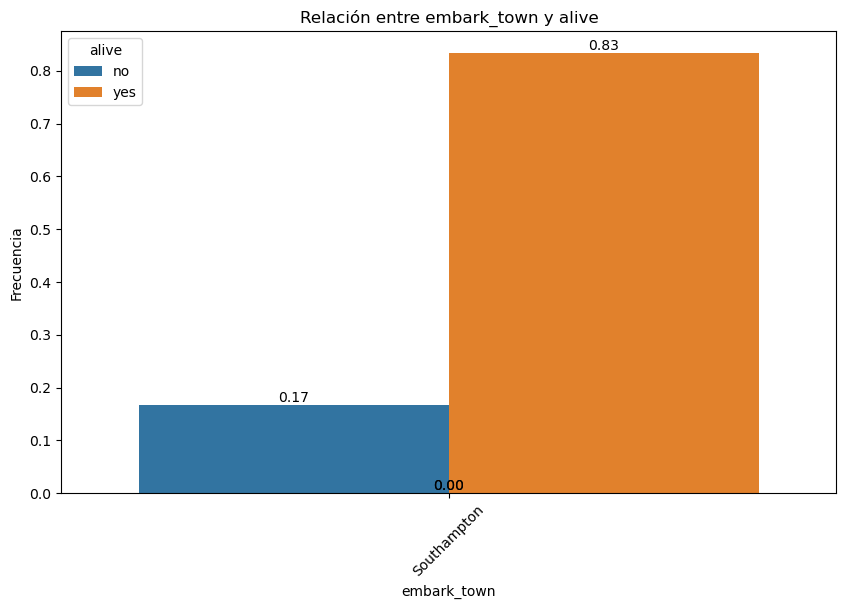

embark_town  Southampton
alive                   
no                     1
yes                    5
Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[1.]
 [5.]]


In [69]:
df_test = df.loc[(df.who == "child") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

print(tabla_contingencia)

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Solo embarcaron niños (6) en primera en Southampton y además muy pocos para tener un valor estadístico extrapolable, con lo que no podemos decir nada sobre la dependencia de este grupo respecto al puerto.*

Niños de segunda clase

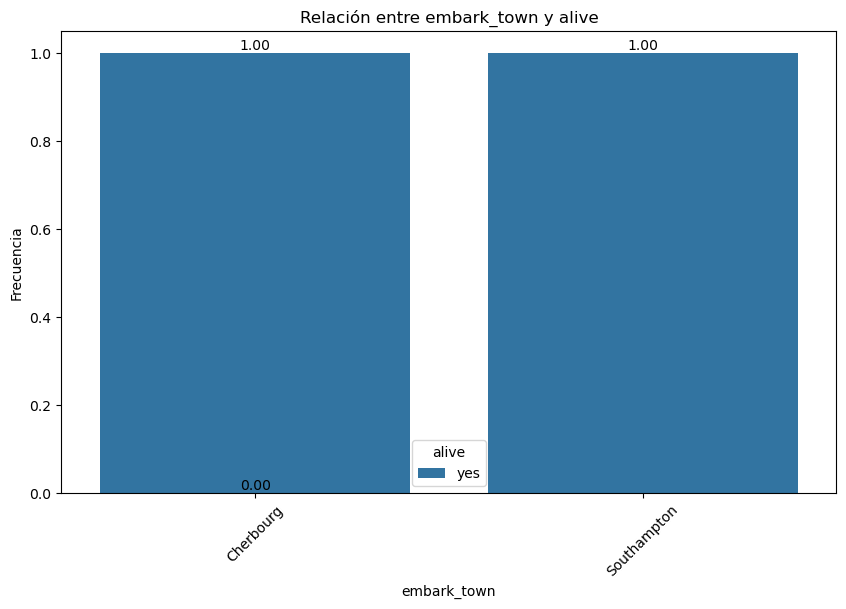

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[ 3. 16.]]


In [70]:
df_test = df.loc[(df.who == "child") & (df["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Sobrevivieron todos los niños que embarcaron en segunda independientemente de dónde embarcaron, es cierto que la muestra es pequeña, pero de primeras refuerza la hipótesis de que no influyó el puerto de embarque para niños, ni para hombres. Terminemos de comprobarlo para niños y tercera clase*

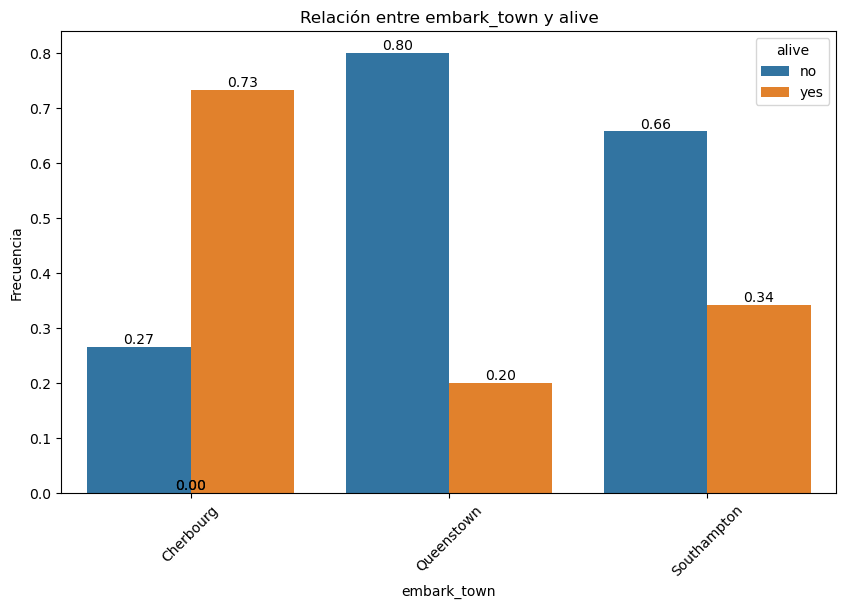

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [71]:
df_test = df.loc[(df.who == "child") & (df["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Pues aquí sí hay depedencia, aunque de nuevo sean valores absolutos bajos, si añadimos nuestras sospechas de ver hombres y tercera, parece que sí hay una relación combinada entre la tercera clase y el puerto. Es decir por ahora la tercera clase que subía en Chersbourhg parece tener un porcentaje más alto de supervivencia que en el resto de puertos.*  

*Terminemos de comprobar esta hipótesis o de reforzarla o refutarla investigando que ocurrió con las mujeres*

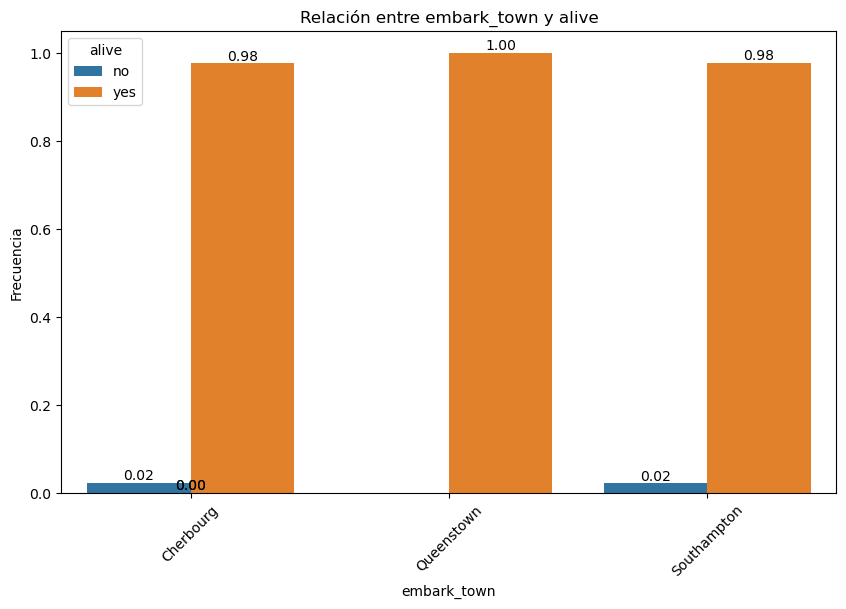

Valor Chi-Cuadrado: 0.02431910659657251
P-Value: 0.987914075337328
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[9.66292135e-01 2.24719101e-02 1.01123596e+00]
 [4.20337079e+01 9.77528090e-01 4.39887640e+01]]


In [72]:
df_test = df.loc[(df.who == "woman") & (df["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Las mujeres que viajaban en primera independientemente del puerto se salvaron casi todas. No hay depedencia aquí con el puerto

Para mujeres y segunda

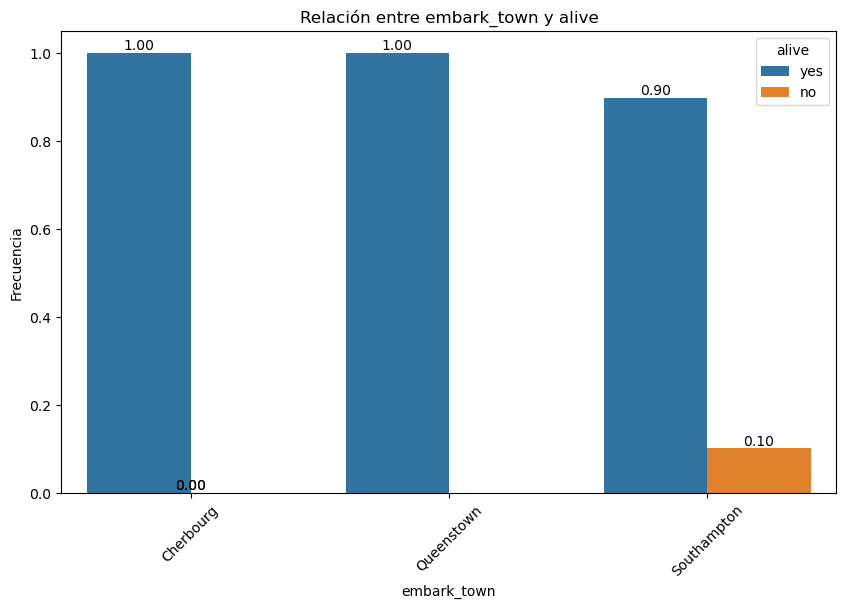

Valor Chi-Cuadrado: 0.7830508474576271
P-Value: 0.6760248632034247
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 0.45454545  0.18181818  5.36363636]
 [ 4.54545455  1.81818182 53.63636364]]


In [73]:
df_test = df.loc[(df.who == "woman") & (df["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Tampoco se puede decir que haya una relación significativa y extrapolable entre la supervivencia de las mujeres en segunda clase y el puerto de embarque. Lo curioso puede venir ahora cuando investiguemos mujeres y tercera clase

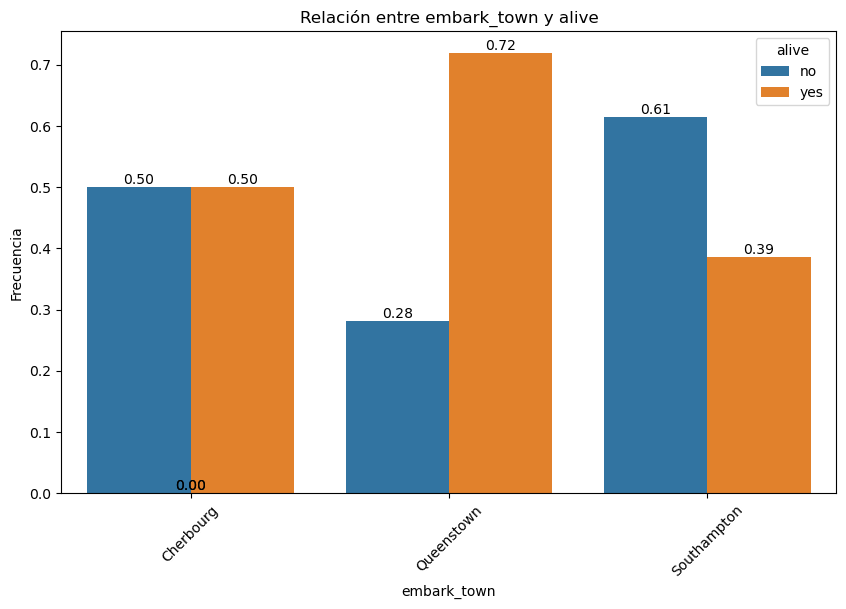

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [74]:
df_test = df.loc[(df.who == "woman") & (df["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p_value)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

*Y aquí se ve otra dependecia estadística significativa entre el puerto de embarque y la supervivencia, las mujeres que subieron en Southampton en tercera lo tuvieron peor que las que lo hicieron en Cherbourg y las que los hicieron en Queenstown (con las que tienen más diferencia)*

Viendo estos resultados, parece que sí influye el puerto de embarque para los pasajeros de tercera, más allá de la clase y el género, grupo de edad. Sería interesante entender mejor esta relación y es un punto más a profundizar, aunque ya no la haremos en esta práctica y se deja abierta para que lo acometas, si quieres, por tu cuenta.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


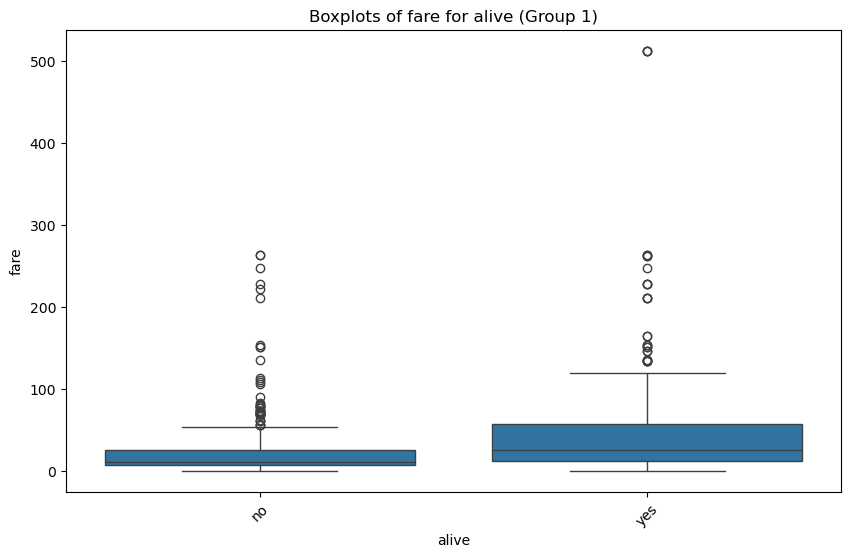

In [75]:
plot_grouped_boxplots(df,"alive","fare")

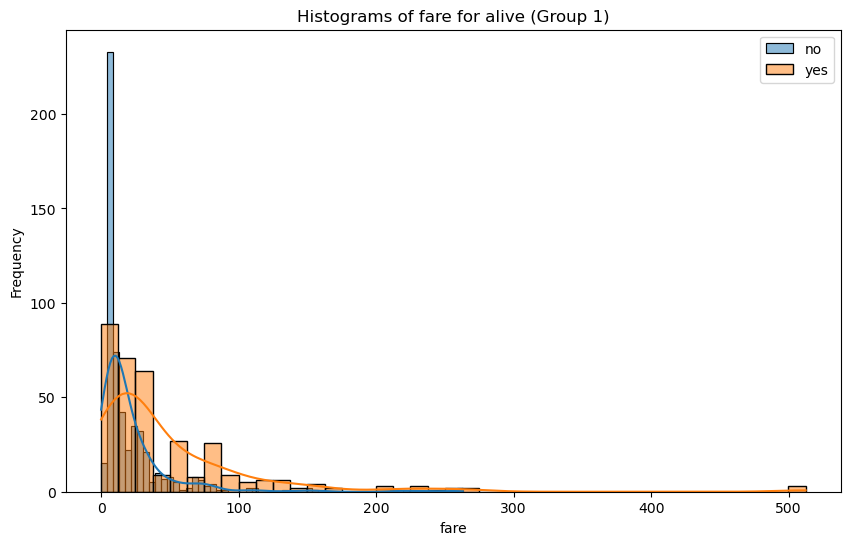

In [76]:
plot_grouped_histograms(df, "alive","fare", group_size = 2)

*Visualmente parece que sí hay influencia, ver diagramas de cajas, y la relación entre cajas, y por ese punto dominante en el NO, que seguramente esté relacionado con la clase*

Hacemos la prueba de U de Mann-whitney

In [77]:
#relacion entre categorica y numerica (ver U Mann-Whitney)
grupo_a = df.loc[df.alive=="yes"]["fare"]
grupo_b = df.loc[df.alive=="no"]["fare"]

u_stat, p_value = mannwhitneyu(grupo_a,grupo_b)

print("Estadistico U:",u_stat)
print("Valor p:", p_value)




Estadistico U: 129951.5
Valor p: 4.553477179250237e-22


Con p-value <<<<< 0.05, podemos decir que existe confianza estadística en la relación entre ambas variables, aunque dicha relación probablemete venga de la relación entre precio y clase

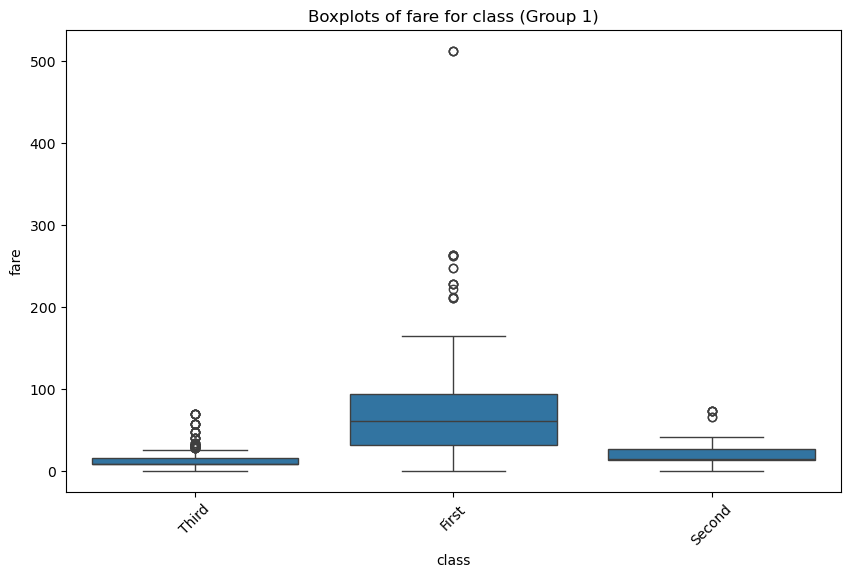

In [78]:
plot_grouped_boxplots(df,"class","fare")

In [79]:
df_alive = df.loc[df.alive == "yes"].copy()
df_dead = df.loc[df.alive == "no"].copy()

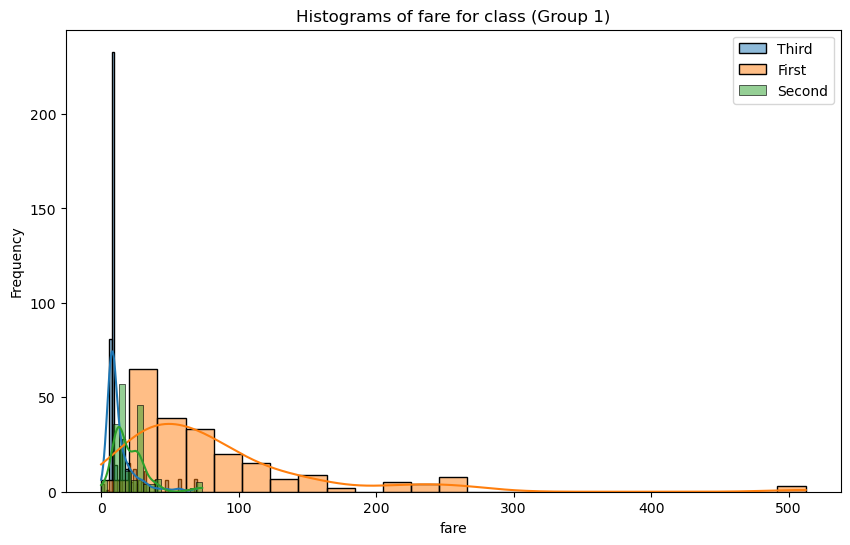

In [80]:
plot_grouped_histograms(df,"class","fare", group_size = 3)

*El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare y comparar si además el precio independientemente de la clase es lo que hizo sobrevivir, es decir no era la clase sino el precio el que te daba mejor cabina*

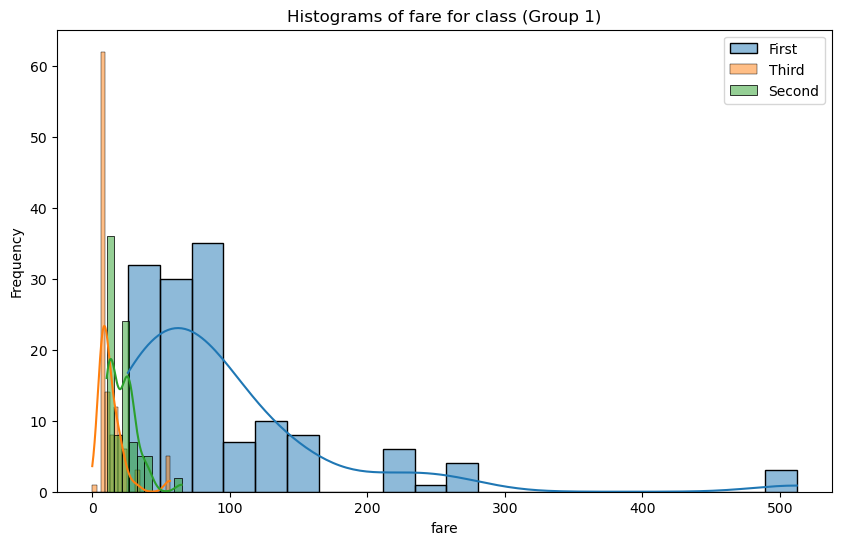

In [81]:
plot_grouped_histograms(df_alive,"class","fare", group_size = 3)

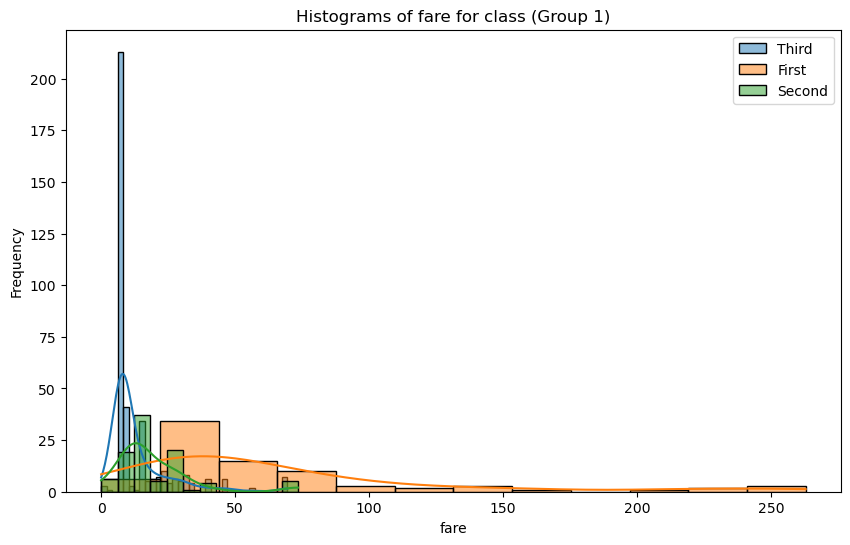

In [82]:
plot_grouped_histograms(df_dead,"class","fare", group_size = 3)

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [83]:
df.loc[df.fare==0]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
179,male,36.0,0,0,0.0,Third,man,True,Southampton,no,True,0,False
263,male,40.0,0,0,0.0,First,man,True,Southampton,no,True,0,False
271,male,25.0,0,0,0.0,Third,man,True,Southampton,yes,True,0,False
277,male,30.0,0,0,0.0,Second,man,True,Southampton,no,True,0,True
302,male,19.0,0,0,0.0,Third,man,True,Southampton,no,True,0,False
413,male,30.0,0,0,0.0,Second,man,True,Southampton,no,True,0,True
466,male,30.0,0,0,0.0,Second,man,True,Southampton,no,True,0,True
481,male,30.0,0,0,0.0,Second,man,True,Southampton,no,True,0,True
597,male,49.0,0,0,0.0,Third,man,True,Southampton,no,True,0,False
633,male,30.0,0,0,0.0,First,man,True,Southampton,no,True,0,True


Todos embarcaron en Southampton, todos hombres, de varias clases, edades de trabajar. Primera suposición: la tripulación.

In [84]:
df.loc[df.fare==df.fare.max()]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_imputed
258,female,35.0,0,0,512.3292,First,woman,False,Cherbourg,yes,True,0,False
679,male,36.0,0,1,512.3292,First,man,True,Cherbourg,yes,False,1,False
737,male,35.0,0,0,512.3292,First,man,True,Cherbourg,yes,True,0,False


No sólo era una persona, fueron tres pasajes, sólo una viajaba acompañada, sobrevieron los tres.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muéstralo numérica o visualmente.

In [86]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)

In [87]:
# Escojo una de las categoricas
# Me creo tantos datasets o dataframes como valores de la categorica escogida
# Para cada dataframe me hago un analisis bivariante ente la categorica que no había escogido y la numérica.
# Comparo los análisis bivariantes entre sí

Respuesta Southampton:


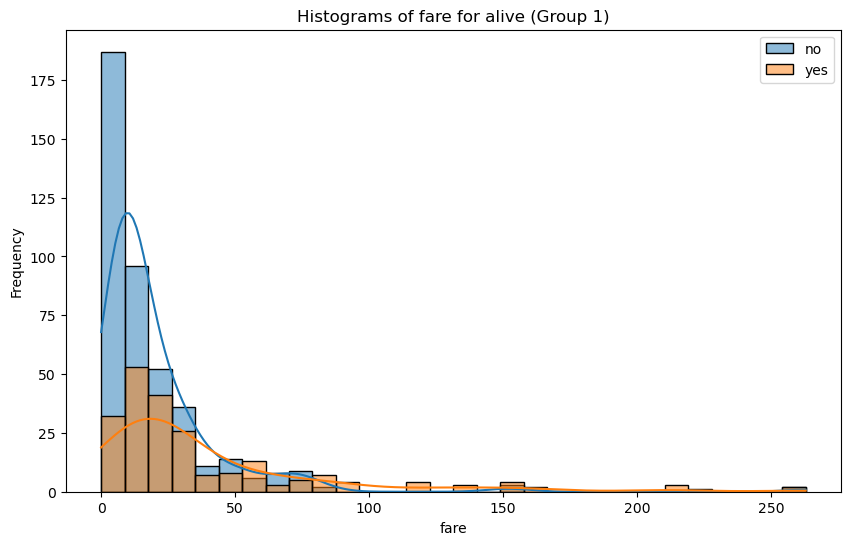

Respuesta Cherbourg:


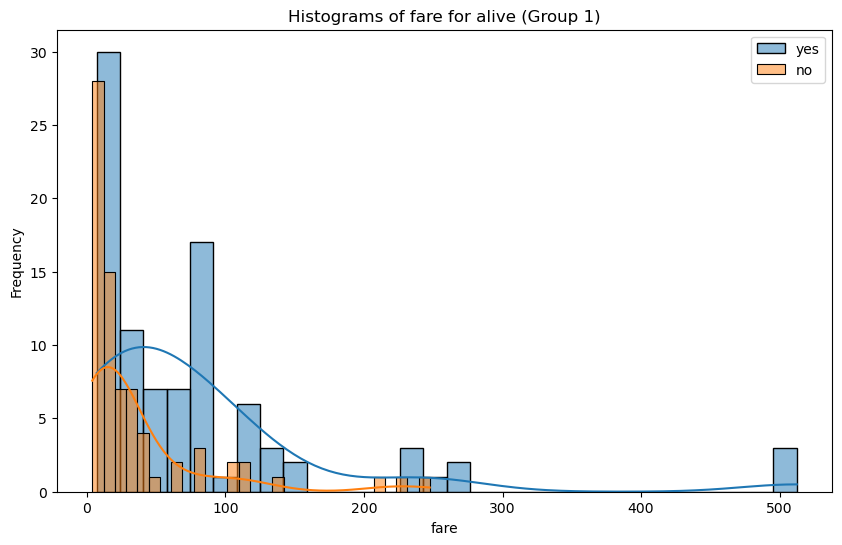

Respuesta Queenstown:


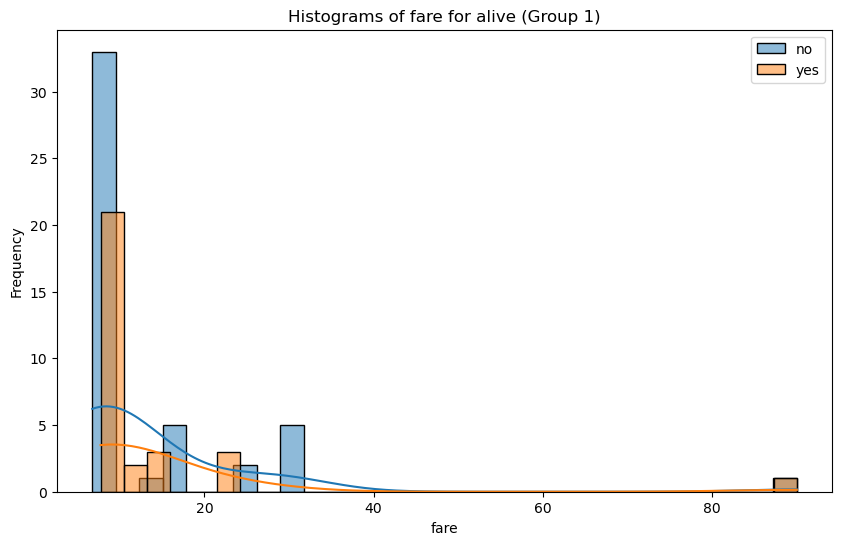

Respuesta nan:


In [88]:
trivariant_analysis(df, "embark_town","alive","fare", 2, 30)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

*Necesitamos hacer una agrupación de edad para poder contestar a la pregunta, para ello pintamos la distribución de la misma y elegimos cómo hacer el binning de esta*

(2,)


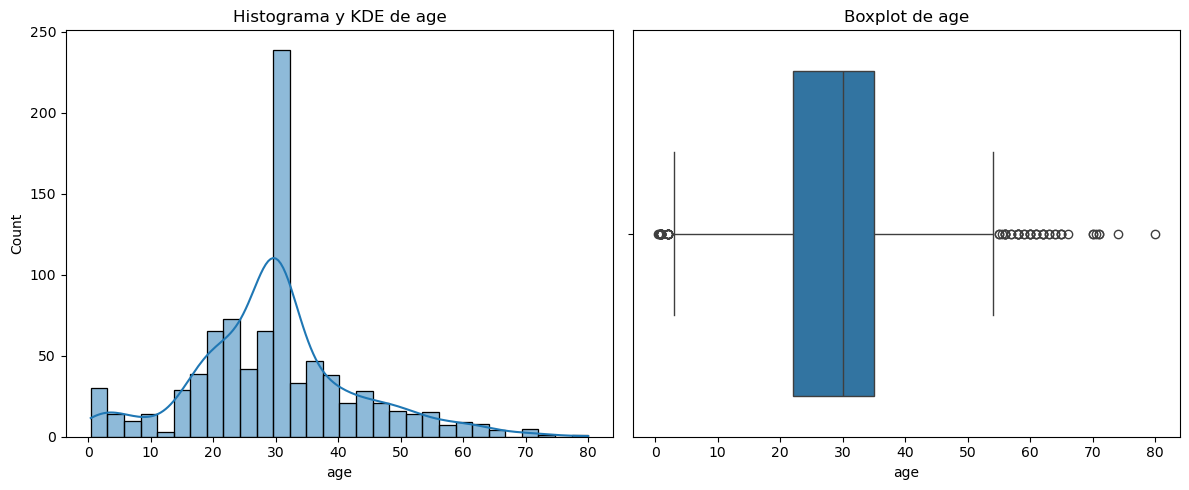

In [90]:
plot_combined_graphs(df,["age"])

In [91]:
df.age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [92]:
# Escojo cuartiles como límites:
bins = [0,22,30,35,80]
df["cat_age"] = pd.cut(df.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

Respuesta age_1:


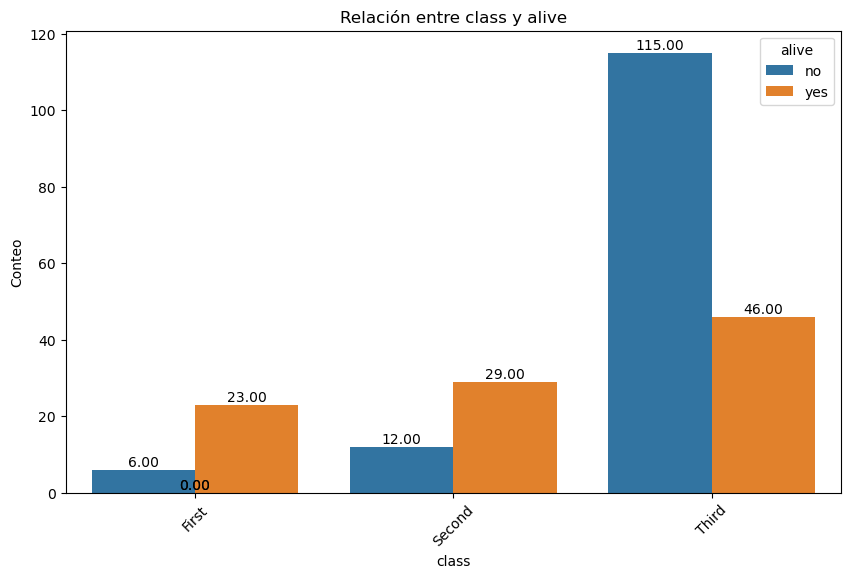

Respuesta age_4:


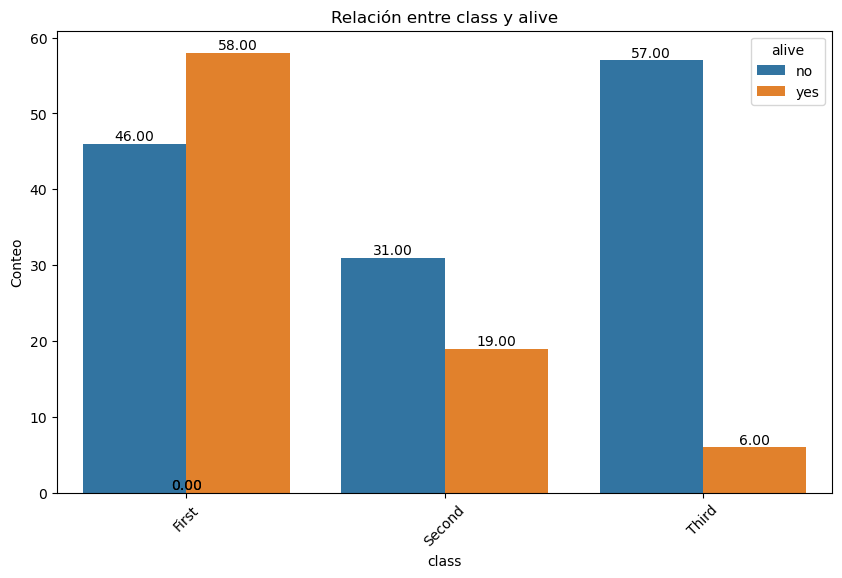

Respuesta age_2:


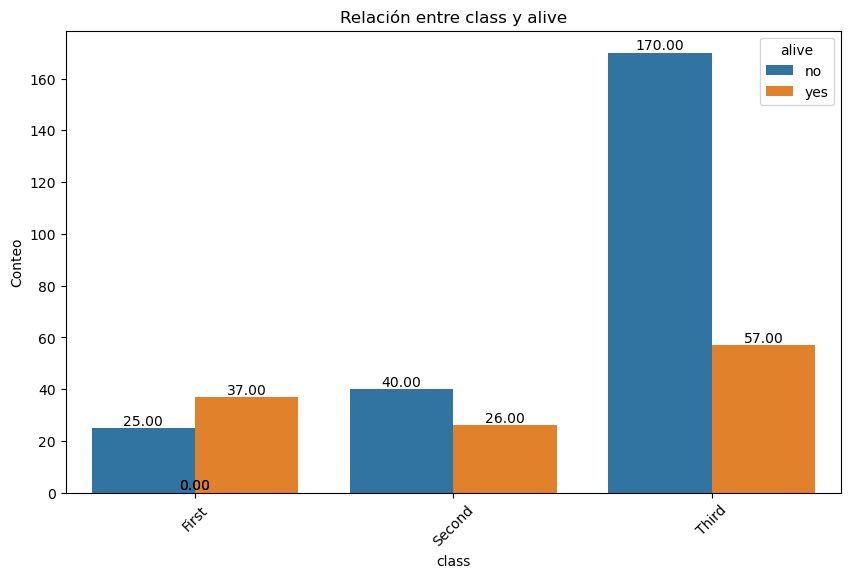

Respuesta age_3:


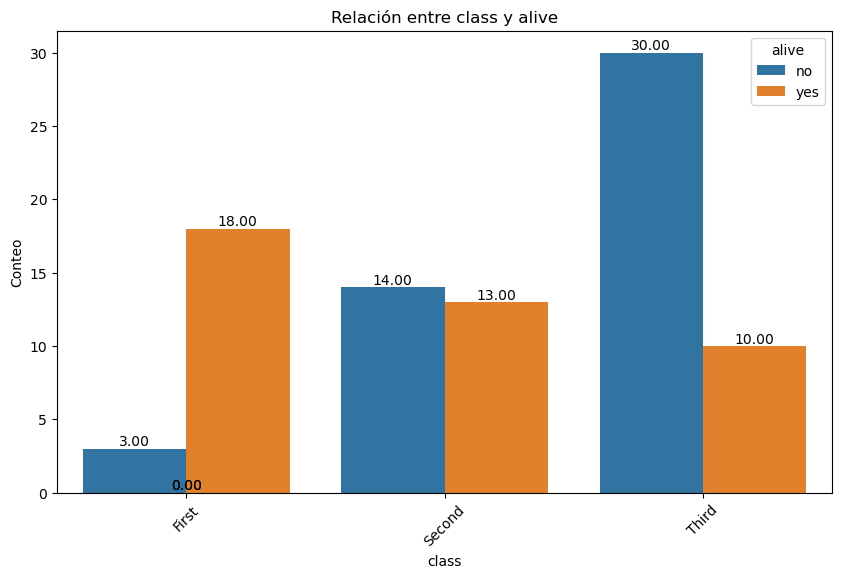

In [93]:
# Ahora hago el multivariante
tricategorical_analysis(df = df, directora = "cat_age", otras = ["alive","class"], muestra_valores = True)

En términos relativos, la combinación cat_age1-Primera clase, es decir menores de 22 en primera clase es la que mayor ratio de supervivencia presenta, siendo los mayores de 35 (cat_age_3 y cat_age_4 conjuntamente) de tercera clase la que peor ratio de supervivencia tiene

Respuesta age_1:


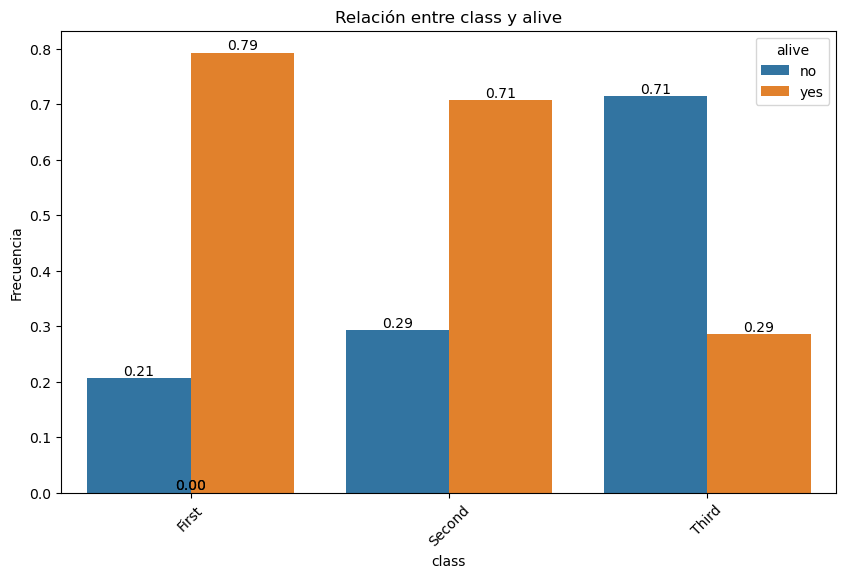

Respuesta age_4:


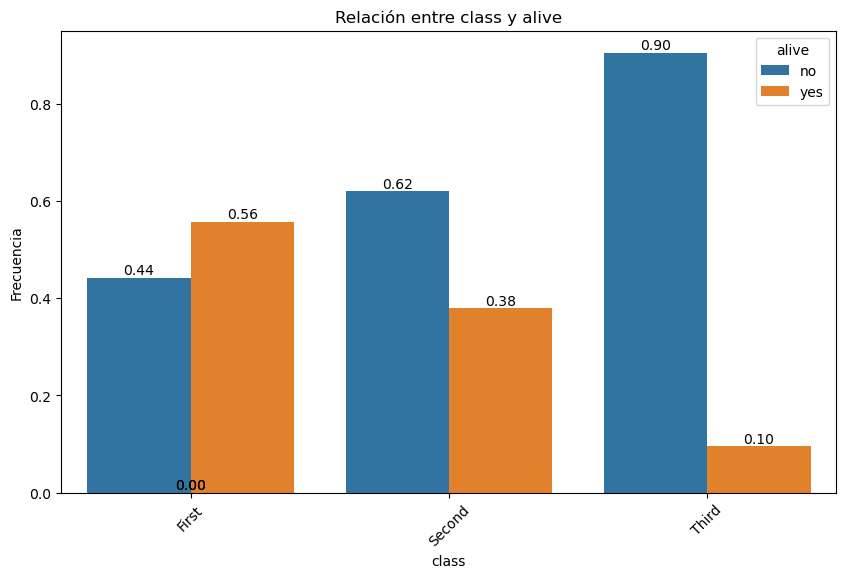

Respuesta age_2:


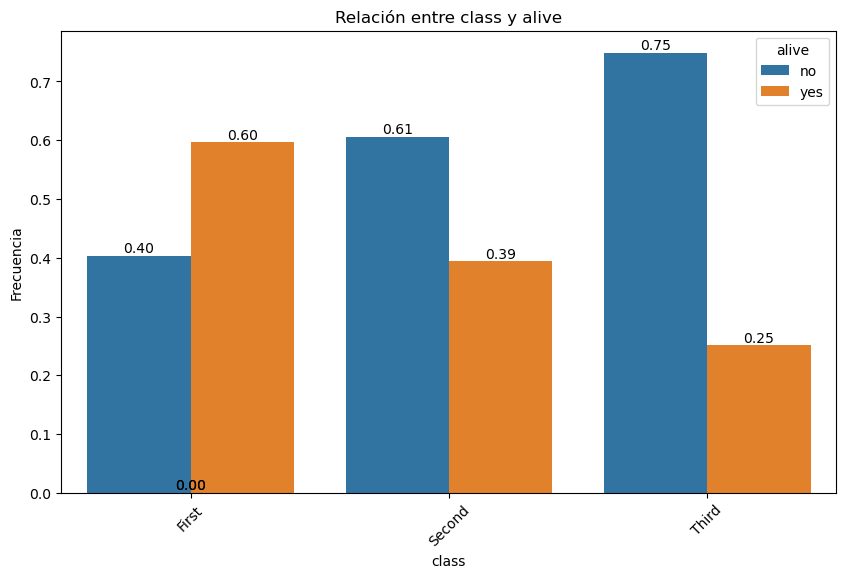

Respuesta age_3:


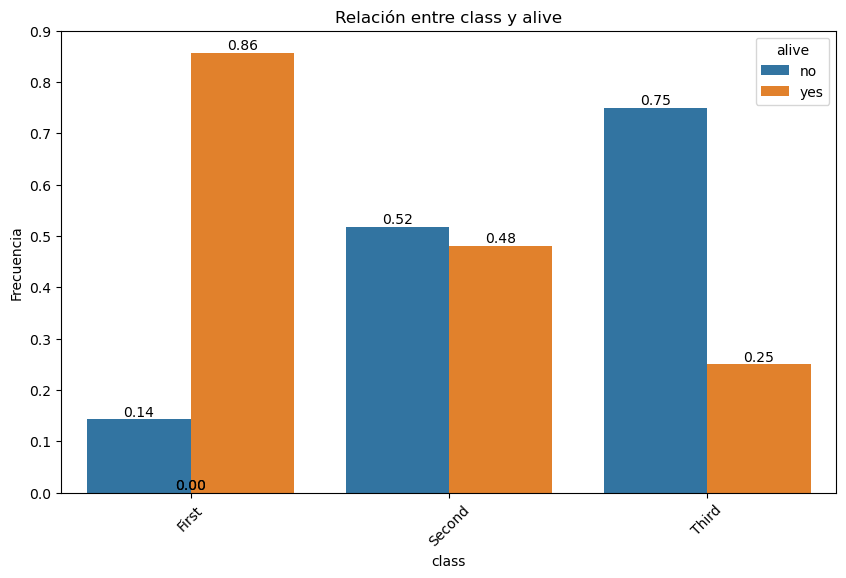

In [94]:
tricategorical_analysis(df = df, directora = "cat_age", otras = ["alive","class"], relativa=True, muestra_valores = True)

*En términos absolutos se salvaron más personas que viajaban en primera clase y eran mayores de 35 años, aunque con 56 supervivientes la combinación tercera clase y edades entre 22 y 30 años también estuvieron ahí. Por el otro lado perecieron más los menores de 22 años que viajaban en tercera y las personas entre 30 y 35 años que también viajaban en tercera.*

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [97]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}

for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


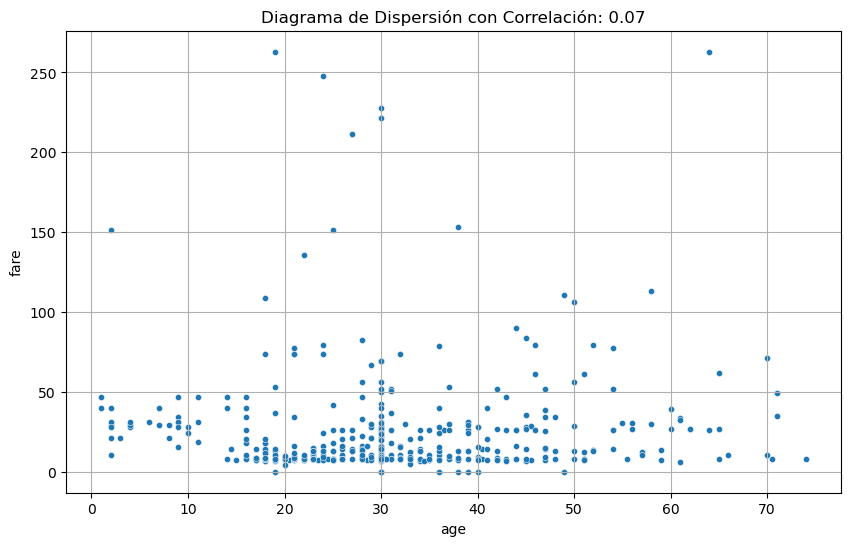

Respuesta yes:


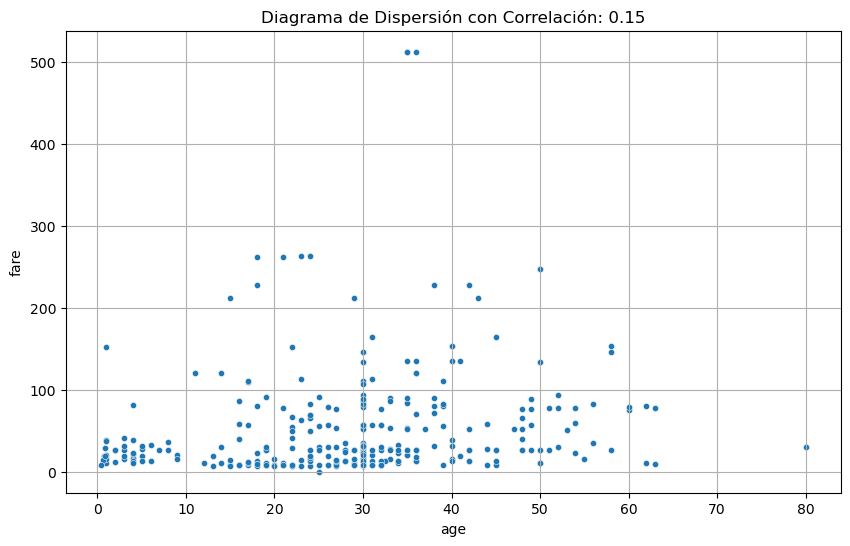

In [98]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

*No se ve una correlación entre edad y el precio del billete independientemente de si se salvaron o no*
*Esto no quiere decir que entre supervivencia y precio y superviviecia y edad no hay cierta relación (de hecho comparando las dos figuras se puede intuir que la edad media es menor entre los supervivientes que entre los fallecidos y el rango de precios de los supervivientes es mayor que el de los fallecidos), que estarían provocadas por la supervivencia superior en mujeres y niños, y en los pasajeros de primera y segunda clase (con precios medios mayores). Un chequeo rápido a las medias (aunque habría que hacer los test correspondientes)*

In [99]:
df.groupby("alive")[["age","fare"]].mean()

,age,fare
alive,,
no,30.483607,22.117887
yes,28.595526,48.395408


## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?